In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For plotting graphs
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score, r2_score

# all different models used here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#to ignore warning
import warnings
warnings.filterwarnings('ignore')
heart=pd.read_csv("D:\Heart.csv")
heart.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [4]:
heart.shape

(303, 15)

In [5]:
heart.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:
heart[[i for i in heart.columns if heart[i].isnull().sum()>0]].isnull().sum()

Ca      4
Thal    2
dtype: int64

In [7]:
heart.Thal.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [8]:
heart.Thal = heart.Thal.fillna('normal')
heart.Thal.value_counts()

normal        168
reversable    117
fixed          18
Name: Thal, dtype: int64

In [9]:
heart.Ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [10]:
heart.Ca = heart.Ca.fillna(0.0)
heart.Ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [11]:
print(heart.ChestPain.unique())
print(heart.Thal.unique())
print(heart.AHD.unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable']
['No' 'Yes']


In [12]:
print(heart.ChestPain.unique())
print(heart.Thal.unique())
print(heart.AHD.unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable']
['No' 'Yes']


In [14]:
heart_encoding = pd.get_dummies(heart[['ChestPain', 'Thal', 'AHD']])
heart_final = pd.concat([heart, heart_encoding],1)
heart_final = heart_final.drop(['ChestPain', 'Thal', 'AHD'], axis = 1)
heart_final.head(2)

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,...,0.0,0,0,0,1,1,0,0,1,0
1,2,67,1,160,286,0,2,108,1,1.5,...,3.0,1,0,0,0,0,1,0,0,1


In [15]:
heart_final.Sex.value_counts()

1    206
0     97
Name: Sex, dtype: int64

In [16]:
heart_final.Sex[heart_final.AHD_Yes ==1].value_counts()

1    114
0     25
Name: Sex, dtype: int64

In [17]:
pd.crosstab(heart_final.AHD_Yes,heart_final.Sex)

Sex,0,1
AHD_Yes,,
0,72,92
1,25,114


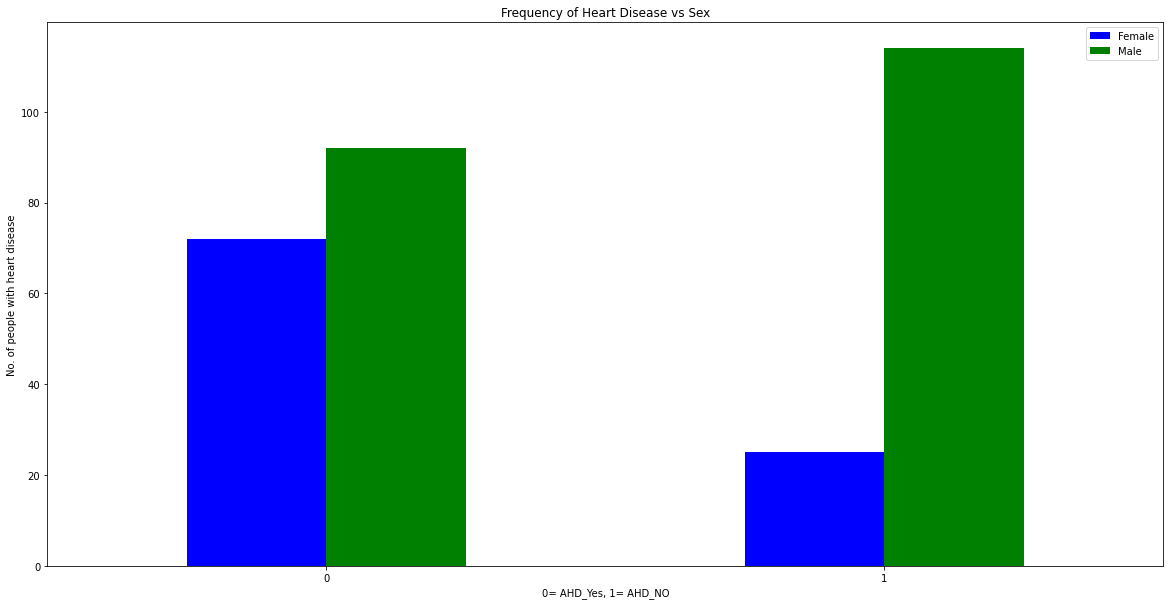

In [18]:
pd.crosstab(heart_final.AHD_Yes,heart_final.Sex).plot(kind='bar',figsize=(20,10),color=["blue","green"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= AHD_Yes, 1= AHD_NO")
plt.ylabel("No. of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

Text(0.5, 1.0, 'males vs females with heart disease')

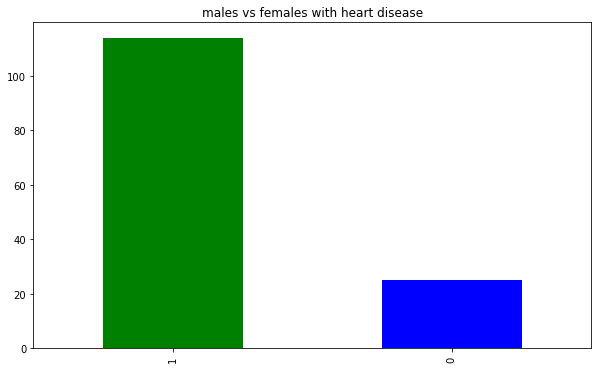

In [19]:
heart_final.Sex[heart_final.AHD_Yes==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("males vs females with heart disease")

In [20]:
heart_final.corr()


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
Unnamed: 0,1.000000,-0.002367,-0.070849,-0.022028,-0.095518,-0.039471,-0.150232,-0.105488,-0.000402,-0.120384,...,0.037011,0.042387,-0.095155,0.069630,-0.015529,0.062412,0.028772,-0.059675,-0.048765,0.048765
Age,-0.002367,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,...,0.365323,0.135337,-0.051714,-0.151684,0.045438,0.062042,-0.132264,0.104902,-0.223120,0.223120
Sex,-0.070849,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,...,0.086048,0.086398,-0.117189,-0.037990,0.089828,0.142524,-0.387396,0.326284,-0.276816,0.276816
RestBP,-0.022028,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,...,0.097528,0.027710,-0.050127,-0.083234,0.149737,0.075157,-0.139782,0.106210,-0.150825,0.150825
Chol,-0.095518,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,...,0.123726,0.070343,-0.033223,-0.016453,-0.053021,-0.095743,-0.006479,0.053100,-0.085164,0.085164
Fbs,-0.039471,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,...,0.140764,-0.062929,0.087027,-0.060649,0.055511,0.091351,-0.073766,0.030953,-0.025264,0.025264
RestECG,-0.150232,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,...,0.131749,0.122589,-0.089526,-0.102979,0.065581,0.044672,-0.028989,0.007905,-0.169202,0.169202
MaxHR,-0.105488,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,...,-0.265699,-0.371989,0.159876,0.249415,0.079683,-0.159523,0.285812,-0.214326,0.417167,-0.417167
ExAng,-0.000402,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,...,0.145788,0.464293,-0.266871,-0.233863,-0.093384,0.063073,-0.324082,0.300223,-0.431894,0.431894
Oldpeak,-0.120384,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,...,0.301067,0.274218,-0.126339,-0.277513,0.086959,0.104635,-0.345731,0.302145,-0.424510,0.424510


In [21]:
heart_final = heart_final.drop(['AHD_No', 'Unnamed: 0'], axis = 1)
heart_final.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0,1


In [22]:
heart_final.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable', 'AHD_Yes'],
      dtype='object')

In [23]:
heart_scaled = heart_final

In [24]:
MMscal=MinMaxScaler()
features=['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable']
heart_scaled[features] = MMscal.fit_transform(heart_final[features])
heart_scaled.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,0.708333,1.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.791667,1.0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.791667,1.0,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.166667,1.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.250000,0.0,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [25]:
X = heart_scaled.drop('AHD_Yes', axis=1)
Y = heart_scaled.AHD_Yes
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2 ,random_state=1)
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info

Thal_normal               0.144292
ChestPain_nonanginal      0.138367
ChestPain_asymptomatic    0.119316
Ca                        0.111847
Oldpeak                   0.109541
ExAng                     0.082180
MaxHR                     0.067873
Thal_reversable           0.062904
RestECG                   0.057338
ChestPain_nontypical      0.056822
Thal_fixed                0.038814
Slope                     0.031295
Chol                      0.023433
ChestPain_typical         0.015200
Sex                       0.000000
Fbs                       0.000000
RestBP                    0.000000
Age                       0.000000
dtype: float64

In [26]:
Req_Columns = list(mutual_info[mutual_info>0].index)
Req_Columns

['Thal_normal',
 'ChestPain_nonanginal',
 'ChestPain_asymptomatic',
 'Ca',
 'Oldpeak',
 'ExAng',
 'MaxHR',
 'Thal_reversable',
 'RestECG',
 'ChestPain_nontypical',
 'Thal_fixed',
 'Slope',
 'Chol',
 'ChestPain_typical']

In [27]:
X_train_final = X_train[Req_Columns]
X_train_final.head(1)

,Thal_normal,ChestPain_nonanginal,ChestPain_asymptomatic,Ca,Oldpeak,ExAng,MaxHR,Thal_reversable,RestECG,ChestPain_nontypical,Thal_fixed,Slope,Chol,ChestPain_typical
62,0.0,0.0,1.0,1.0,0.354839,1.0,0.458015,1.0,1.0,0.0,0.0,0.5,0.205479,0.0


In [29]:
X_test_final = X_test[Req_Columns]
X_test_final.head(1)

,Thal_normal,ChestPain_nonanginal,ChestPain_asymptomatic,Ca,Oldpeak,ExAng,MaxHR,Thal_reversable,RestECG,ChestPain_nontypical,Thal_fixed,Slope,Chol,ChestPain_typical
204,0.0,0.0,1.0,0.0,0.0,0.0,0.687023,1.0,0.0,0.0,0.0,0.0,0.194064,0.0


In [30]:
def evaluation(Y_test,Y_pred):
    acc=accuracy_score(Y_test,Y_pred)
    rcl=recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test,Y_pred)
    auc_score=roc_auc_score(Y_test,Y_pred)
    prec_score=precision_score(Y_test,Y_pred)
    
    metric_dict={'accuracy': round(acc*100,2),
               'recall': round(rcl*100,2),
               'F1 score': round(f1*100,2),
               'auc score': round(auc_score*100,2),
               'precision': round(prec_score*100,2)
                }
    
    return print(metric_dict)

In [31]:
np.random.seed(42)
RFC_model=RandomForestClassifier()
RFC_model.fit(X_train_final,y_train)
RFC_model_y_pred=RFC_model.predict(X_test_final)
RFC_model_r2_score=round(r2_score(y_test,RFC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",RFC_model_r2_score)
print("Accuracy on Training set: ",round(RFC_model.score(X_train_final,y_train)*100,2))
RFC_model_score = round(RFC_model.score(X_test_final,y_test)*100,2)
print("Accuracy on Testing set: ",RFC_model_score)
evaluation(y_test,RFC_model_y_pred)

R2 Score for predicted value:  13.62
Accuracy on Training set:  100.0
Accuracy on Testing set:  78.69
{'accuracy': 78.69, 'recall': 77.78, 'F1 score': 76.36, 'auc score': 78.59, 'precision': 75.0}
